In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

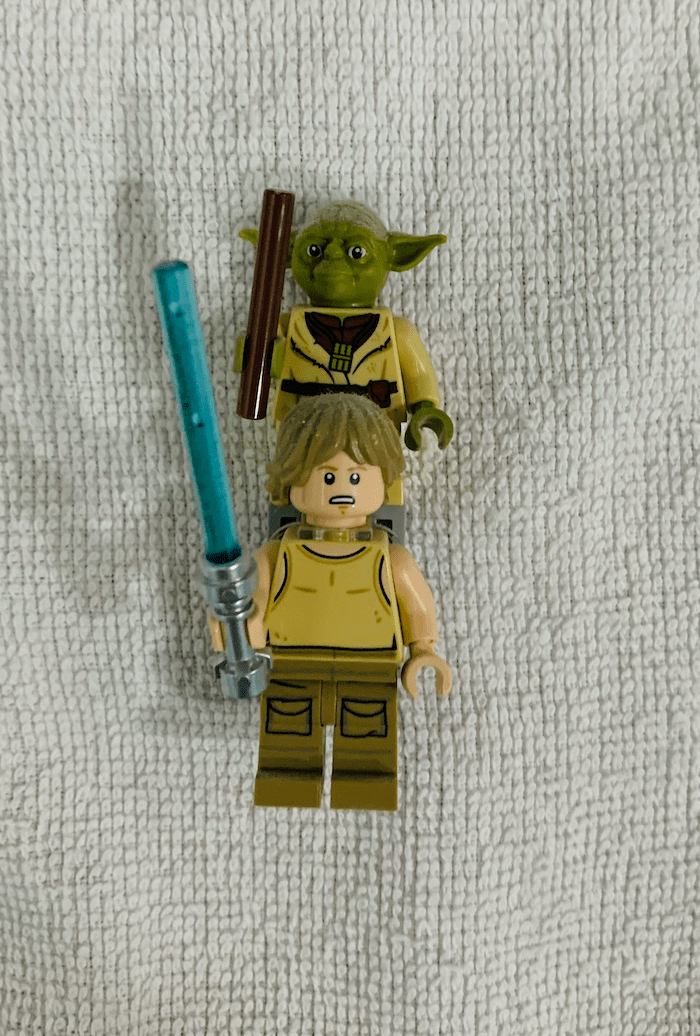

In [22]:
image = cv.imread('/content/drive/My Drive/Dataset/Images/2-min.png')

image_orig = image.copy()

cv2_imshow(image)

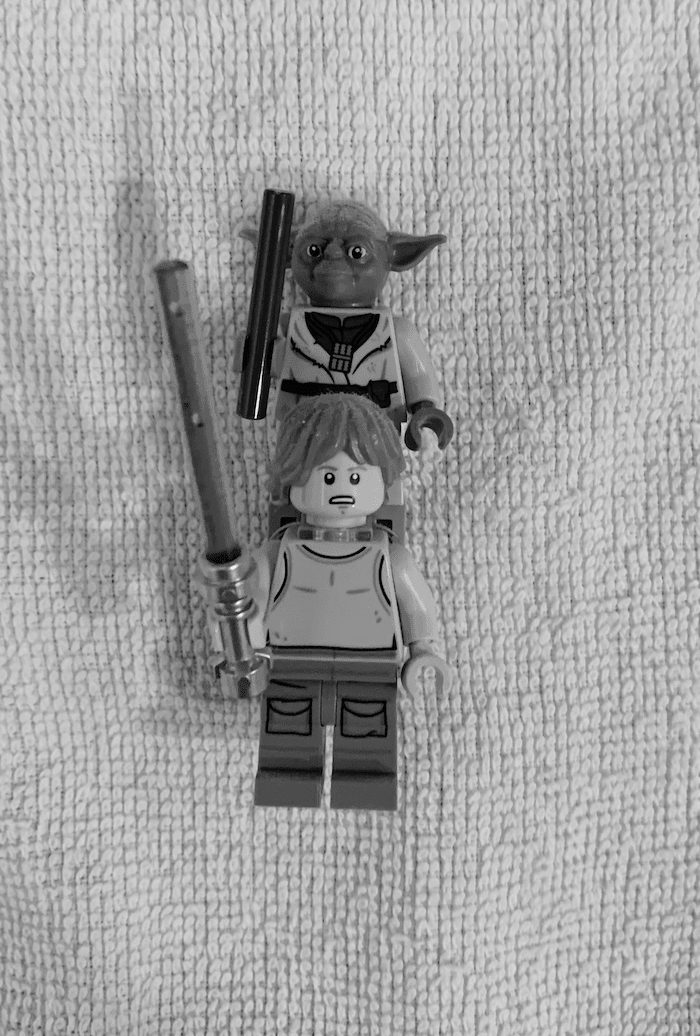

In [4]:
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(image)
# image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# cv2_imshow(image)

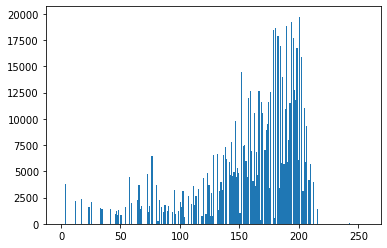

In [5]:
plt.hist(image.flatten(), 256, [0,256])
plt.show()

120.0


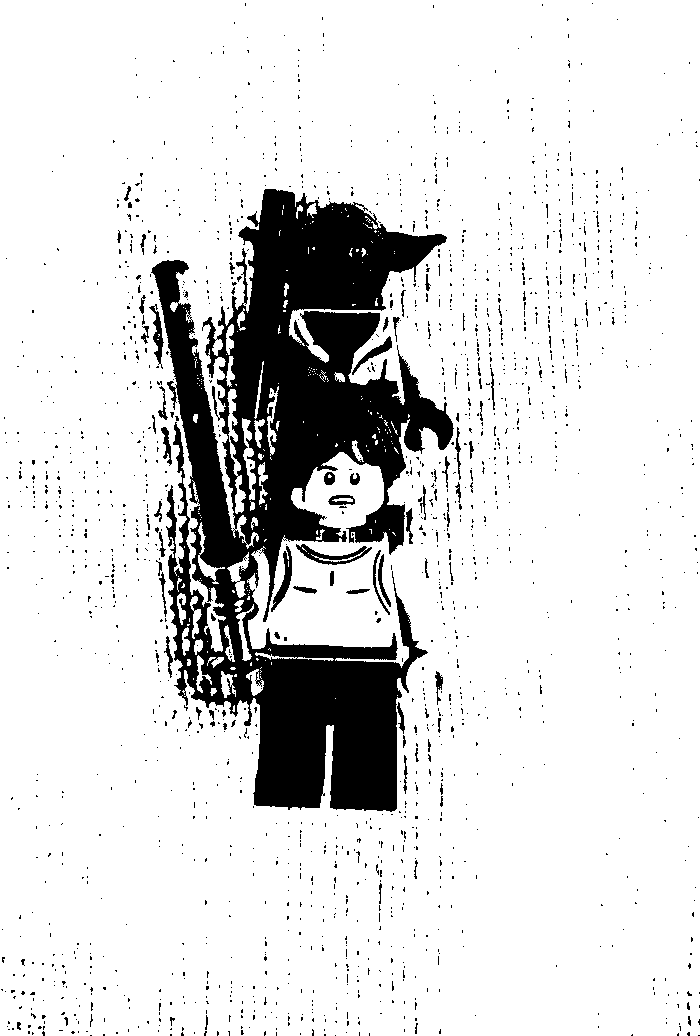

In [8]:
thresholding_value, thresholding_result = cv.threshold(image, 120, 255, cv.THRESH_BINARY)

print(thresholding_value)

cv2_imshow(thresholding_result)

In [9]:
thresholding_result = cv.bitwise_not(thresholding_result)

contours, hierarchy = cv.findContours(thresholding_result, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

print(contours)

[array([[[ 698, 1035]],

       [[ 699, 1035]]], dtype=int32), array([[[ 335, 1035]]], dtype=int32), array([[[  90, 1035]],

       [[  91, 1035]]], dtype=int32), array([[[ 632, 1034]],

       [[ 631, 1035]],

       [[ 632, 1035]]], dtype=int32), array([[[ 324, 1034]],

       [[ 324, 1035]],

       [[ 325, 1035]],

       [[ 325, 1034]]], dtype=int32), array([[[ 170, 1034]],

       [[ 170, 1035]],

       [[ 171, 1035]],

       [[ 171, 1034]]], dtype=int32), array([[[ 103, 1034]],

       [[ 103, 1035]],

       [[ 104, 1035]],

       [[ 104, 1034]]], dtype=int32), array([[[ 678, 1033]],

       [[ 677, 1034]],

       [[ 677, 1035]],

       [[ 678, 1035]]], dtype=int32), array([[[ 369, 1033]],

       [[ 369, 1035]]], dtype=int32), array([[[ 300, 1033]],

       [[ 300, 1034]]], dtype=int32), array([[[ 688, 1032]],

       [[ 687, 1033]],

       [[ 687, 1034]],

       [[ 688, 1035]],

       [[ 689, 1035]],

       [[ 689, 1032]]], dtype=int32), array([[[ 359, 1032]],

     

In [10]:
len(contours)

1799

In [11]:
contours[0]

array([[[ 698, 1035]],

       [[ 699, 1035]]], dtype=int32)

In [12]:
#FeatureExtraxtion Contours
area = cv.contourArea(contours[0])

area

0.0

In [13]:
x, y, w, h = cv.boundingRect(contours[0])

print(x, y, w, h)

698 1035 2 1


In [14]:
for index, contour in enumerate(contours):
  x, y, w, h = cv.boundingRect(contour)
  area = cv.contourArea(contour)

  print("Contour #" + str(index), x, y, w, h, area)


Contour #0 698 1035 2 1 0.0
Contour #1 335 1035 1 1 0.0
Contour #2 90 1035 2 1 0.0
Contour #3 631 1034 2 2 0.5
Contour #4 324 1034 2 2 1.0
Contour #5 170 1034 2 2 1.0
Contour #6 103 1034 2 2 1.0
Contour #7 677 1033 2 3 1.5
Contour #8 369 1033 1 3 0.0
Contour #9 300 1033 1 2 0.0
Contour #10 687 1032 3 4 5.0
Contour #11 359 1032 1 4 0.0
Contour #12 346 1032 1 1 0.0
Contour #13 276 1032 1 4 0.0
Contour #14 194 1032 1 2 0.0
Contour #15 181 1032 3 4 4.0
Contour #16 116 1032 2 2 1.0
Contour #17 32 1032 2 3 1.0
Contour #18 264 1031 2 5 3.0
Contour #19 228 1031 2 5 0.5
Contour #20 217 1031 2 5 3.0
Contour #21 204 1031 3 5 4.0
Contour #22 86 1031 2 1 0.0
Contour #23 78 1031 1 2 0.0
Contour #24 71 1031 4 3 4.0
Contour #25 42 1031 3 5 5.5
Contour #26 28 1031 2 3 2.0
Contour #27 241 1030 3 5 5.0
Contour #28 158 1030 1 2 0.0
Contour #29 59 1030 4 1 0.0
Contour #30 439 1029 2 5 2.5
Contour #31 404 1029 1 3 0.0
Contour #32 324 1029 1 2 0.0
Contour #33 312 1029 2 7 3.5
Contour #34 128 1029 1 3 0.0
Con

Object-1


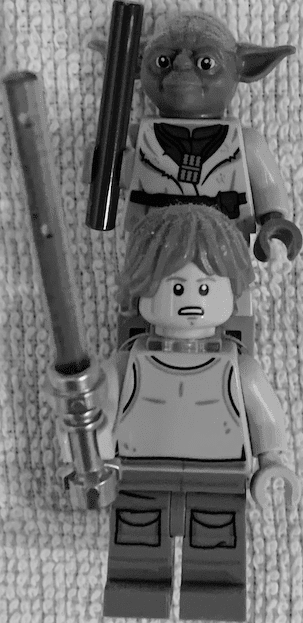

In [20]:
x, y, w, h = cv.boundingRect(contours[1608])
starwars = image[y:y+h, x:x+w]
print('Object-1')
cv2_imshow(starwars)



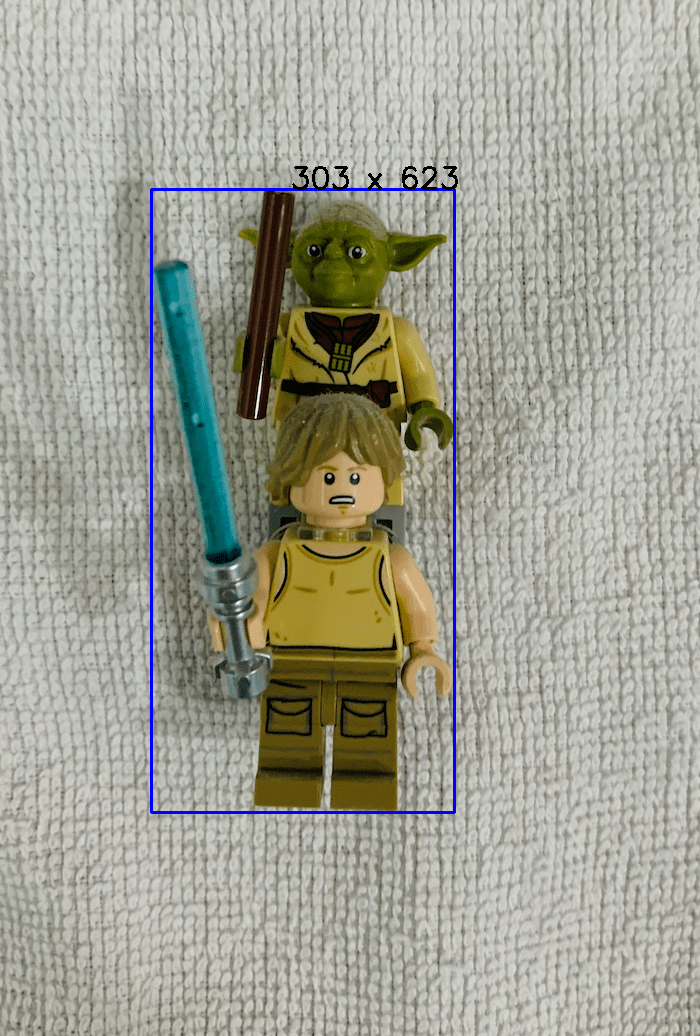

In [23]:
cv.rectangle(image_orig, (x,y), (x+w,y+h), (255,0,0), 2)
font = cv.FONT_HERSHEY_SIMPLEX
bottomRightCornerOfText = (290,188)
fontScale = 1
fontColor = (0,0,0)
lineType = 2
text = str(w) + ' x ' + str(h)
cv.putText(image_orig, text, bottomRightCornerOfText, font, fontScale, fontColor, lineType)
cv2_imshow(image_orig)


Proses preprosesing sebelum ekstraksi contour : Gambar diubah menjadi abu-abu menggunakan grayscale. Kemudian dilakukan global thresholding pada gambar yang telah di grayscale agar gambar berwarna hitam putih sehingga mudah melihat mana yang background mana yang objek. Dikarenakan background berwarna putih, maka diperlukan fungsi bitwise karena program membaca background hanya berwarna hitam. Dari hasil thresholding didapatkan contournya.

